In [1]:
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [7]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
import matplotlib.pyplot as plt

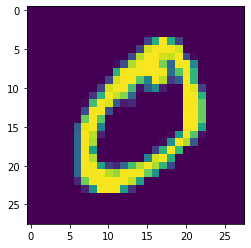

In [13]:
plt.imshow(X_train[1])

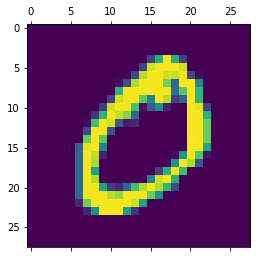

In [14]:
plt.matshow(X_train[1])

In [15]:
X_train.shape

(60000, 28, 28)

In [23]:
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [25]:
X_train_flatten.shape

(60000, 784)

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4695 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 1s 753us/step - loss: 0.2833 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 1s 763us/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 1s 730us/step - loss: 0.2667 - accuracy: 0.9262


In [27]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 867us/step - loss: 0.2684 - accuracy: 0.9260


[0.26837193965911865, 0.9259999990463257]

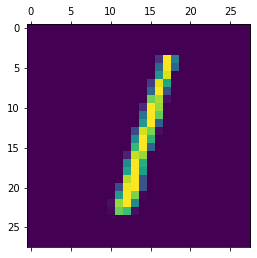

In [34]:
plt.matshow(X_test[2])

In [31]:
y_pred = model.predict(X_test_flatten)

In [35]:
y_pred[2]

array([3.3265352e-04, 9.9456173e-01, 6.7173940e-01, 2.7956814e-01,
       2.6482910e-02, 1.0276255e-01, 1.5842608e-01, 2.1588957e-01,
       3.7578079e-01, 4.3852836e-02], dtype=float32)

In [36]:
np.argmax(y_pred[2])

1

In [37]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [39]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_pred_labels)

In [41]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    6,    2,    3,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    9,  930,   16,    7,    5,   12,   11,   36,    3],
       [   1,    0,   18,  929,    0,   23,    2,   14,   19,    4],
       [   1,    2,    6,    1,  926,    0,    9,    5,    9,   23],
       [   7,    3,    3,   37,   10,  776,   14,    7,   30,    5],
       [   8,    3,    5,    1,    7,   14,  915,    2,    3,    0],
       [   1,    7,   22,    6,    7,    0,    0,  965,    1,   19],
       [   7,   12,    6,   23,    9,   27,    8,   14,  861,    7],
       [   9,    7,    2,   11,   38,    9,    0,   45,    7,  881]])>

Text(69.0, 0.5, 'Truth')

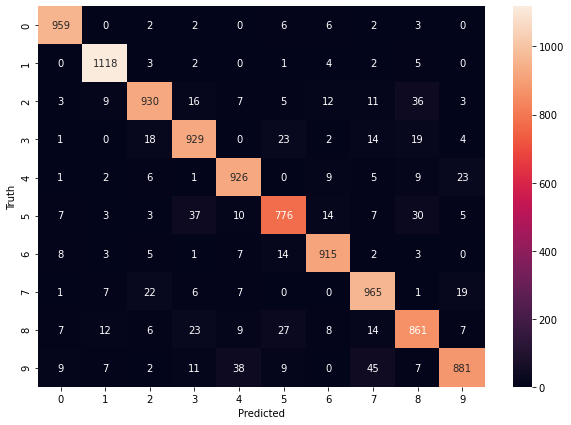

In [44]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2762 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1205 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0845 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0644 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0509 - accuracy: 0.9844


In [46]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9739


[0.08249428123235703, 0.9739000201225281]

Text(69.0, 0.5, 'Truth')

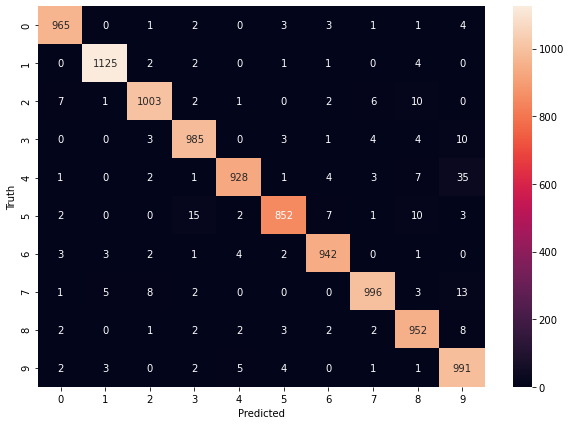

In [47]:
y_pred = model.predict(X_test_flatten)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')




In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callbak = tf.keras.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1266 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0899 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0682 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0533 - accuracy: 0.9836
